##- 상권코드와 시군구명을 활용해서 5개년도 유동인구/거주인구/생활인구의 main 컬럼을 자치구, 행정동 정보와 연결하기 : 정용

라이브러리 호출

In [1]:
import os
import time
import numpy as np
import pandas as pd

from glob import glob
from functools import reduce

!pip install pyproj
import pyproj
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataton')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


데이터 불러오기

In [2]:
filename_resident_pop = glob('./reference/resident*main*')
filename_working_pop = glob('./reference/working*main*')
filename_life_pop = glob('./reference/life*main*')

print(filename_resident_pop)
print(filename_working_pop)
print(filename_life_pop)

['./reference/resident_population_2017_4_main.csv', './reference/resident_population_2018_4_main.csv', './reference/resident_population_2019_4_main.csv', './reference/resident_population_2020_4_main.csv', './reference/resident_population_2021_4_main.csv']
['./reference/working_population_2017_4_main.csv', './reference/working_population_2018_4_main.csv', './reference/working_population_2019_4_main.csv', './reference/working_population_2020_4_main.csv', './reference/working_population_2021_4_main.csv']
['./reference/life_population_2019_4_main.csv', './reference/life_population_2020_4_main.csv', './reference/life_population_2018_4_main.csv', './reference/life_population_2021_4_main.csv', './reference/life_population_2017_4_main.csv']


In [3]:
'''Trading information'''
info_2017 = pd.read_csv("commercial_info_2017.csv", sep = ',')
info_2018 = pd.read_csv("commercial_info_2018.csv", sep = ',')
info_2019 = pd.read_csv("commercial_info_2019.csv", sep = ',')
info_2020 = pd.read_csv("commercial_info_2020.csv", sep = ',')
info_2021 = pd.read_csv("commercial_info_2021.csv", sep = ',')

'''Trading area'''
area = pd.read_csv("./reference/commercial_area2021.csv", sep = ',')

'''Resident population'''
resi_pop_2017 = pd.read_csv("./reference/resident_population_2017_4_main.csv", sep = ',')
resi_pop_2018 = pd.read_csv("./reference/resident_population_2018_4_main.csv", sep = ',')
resi_pop_2019 = pd.read_csv("./reference/resident_population_2019_4_main.csv", sep = ',')
resi_pop_2020 = pd.read_csv("./reference/resident_population_2020_4_main.csv", sep = ',')
resi_pop_2021 = pd.read_csv("./reference/resident_population_2021_4_main.csv", sep = ',')

'''Working population'''
work_pop_2017 = pd.read_csv("./reference/working_population_2017_4_main.csv", sep = ',')
work_pop_2018 = pd.read_csv("./reference/working_population_2018_4_main.csv", sep = ',')
work_pop_2019 = pd.read_csv("./reference/working_population_2019_4_main.csv", sep = ',')
work_pop_2020 = pd.read_csv("./reference/working_population_2020_4_main.csv", sep = ',')
work_pop_2021= pd.read_csv("./reference/working_population_2021_4_main.csv", sep = ',')

'''Life population'''
life_pop_2017 = pd.read_csv("./reference/life_population_2017_4_main.csv", sep = ',')
life_pop_2018 = pd.read_csv("./reference/life_population_2018_4_main.csv", sep = ',')
life_pop_2019 = pd.read_csv("./reference/life_population_2019_4_main.csv", sep = ',')
life_pop_2020 = pd.read_csv("./reference/life_population_2020_4_main.csv", sep = ',')
life_pop_2021 = pd.read_csv("./reference/life_population_2021_4_main.csv", sep = ',')

컬럼 추출 및 전처리

In [4]:
info_gudong_2017 = info_2017[['상권업종대분류명','시군구코드','시군구명','행정동명','경도','위도']]
info_gudong_2018 = info_2018[['상권업종대분류명','시군구코드','시군구명','행정동명','경도','위도']]
info_gudong_2019 = info_2019[['상권업종대분류명','시군구코드','시군구명','행정동명','경도','위도']]
info_gudong_2020 = info_2020[['상권업종대분류명','시군구코드','시군구명','행정동명','경도','위도']]
info_gudong_2021 = info_2021[['상권업종대분류명','시군구코드','시군구명','행정동명','경도','위도']]

In [5]:
info_gudong_2017.rename(columns = {"시군구코드": "시군구_코드"},inplace = True)
info_gudong_2018.rename(columns = {"시군구코드": "시군구_코드"},inplace = True)
info_gudong_2019.rename(columns = {"시군구코드": "시군구_코드"},inplace = True)
info_gudong_2020.rename(columns = {"시군구코드": "시군구_코드"},inplace = True)
info_gudong_2021.rename(columns = {"시군구코드": "시군구_코드"},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
resi_pop_2017.rename(columns = {"상권 코드": "상권_코드"},inplace = True)
resi_pop_2018.rename(columns = {"상권 코드": "상권_코드"},inplace = True)
resi_pop_2019.rename(columns = {"상권 코드": "상권_코드"},inplace = True)
resi_pop_2020.rename(columns = {"상권 코드": "상권_코드"},inplace = True)
resi_pop_2021.rename(columns = {"상권 코드": "상권_코드"},inplace = True)

In [7]:
df_list_2017 = [ area, info_gudong_2017, resi_pop_2017, work_pop_2017, life_pop_2017]
df_list_2018 = [ area, info_gudong_2018, resi_pop_2018, work_pop_2018, life_pop_2018]
df_list_2019 = [ area, info_gudong_2019, resi_pop_2019, work_pop_2019, life_pop_2019]
df_list_2020 = [ area, info_gudong_2020, resi_pop_2020, work_pop_2020, life_pop_2020]
df_list_2021 = [ area, info_gudong_2021, resi_pop_2021, work_pop_2021, life_pop_2021]

In [8]:
for i in df_list_2020:
    print(i.columns)

Index(['기준_년월_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '엑스좌표_값', '와이좌표_값',
       '시군구_코드'],
      dtype='object')
Index(['상권업종대분류명', '시군구_코드', '시군구명', '행정동명', '경도', '위도'], dtype='object')
Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '총 상주인구 수',
       '남성 상주인구 수', '여성 상주인구 수'],
      dtype='object')
Index(['기준_년월_코드', '기준_분기_코드', '상권_구분_코드', '상권_코드', '상권_코드_명', '총_직장_인구_수',
       '남성_직장_인구_수', '여성_직장_인구_수'],
      dtype='object')
Index(['기준 년코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '총_생활인구_수',
       '남성_생활인구_수', '여성_생활인구_수'],
      dtype='object')


In [9]:
resi_pop_2017 = resi_pop_2017[resi_pop_2017.columns[3:]]
work_pop_2017 = work_pop_2017[work_pop_2017.columns[3:]]
life_pop_2017 = life_pop_2017[life_pop_2017.columns[3:]]

resi_pop_2018 = resi_pop_2018[resi_pop_2018.columns[3:]]
work_pop_2018 = work_pop_2018[work_pop_2018.columns[3:]]
life_pop_2018 = life_pop_2018[life_pop_2018.columns[3:]]

resi_pop_2019 = resi_pop_2019[resi_pop_2019.columns[3:]]
work_pop_2019 = work_pop_2019[work_pop_2019.columns[3:]]
life_pop_2019 = life_pop_2019[life_pop_2019.columns[3:]]

resi_pop_2020 = resi_pop_2020[resi_pop_2020.columns[3:]]
work_pop_2020 = work_pop_2020[work_pop_2020.columns[3:]]
life_pop_2020 = life_pop_2020[life_pop_2020.columns[3:]]

resi_pop_2021 = resi_pop_2021[resi_pop_2021.columns[3:]]
work_pop_2021 = work_pop_2021[work_pop_2021.columns[3:]]
life_pop_2021 = life_pop_2021[life_pop_2021.columns[3:]]

In [10]:
df_list_2017 = [ area, info_gudong_2017, resi_pop_2017, work_pop_2017, life_pop_2017]
df_list_2018 = [ area, info_gudong_2018, resi_pop_2018, work_pop_2018, life_pop_2018]
df_list_2019 = [ area, info_gudong_2019, resi_pop_2019, work_pop_2019, life_pop_2019]
df_list_2020 = [ area, info_gudong_2020, resi_pop_2020, work_pop_2020, life_pop_2020]
df_list_2021 = [ area, info_gudong_2021, resi_pop_2021, work_pop_2021, life_pop_2021]

for i in df_list_2017:
    print(i.columns)

Index(['기준_년월_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '엑스좌표_값', '와이좌표_값',
       '시군구_코드'],
      dtype='object')
Index(['상권업종대분류명', '시군구_코드', '시군구명', '행정동명', '경도', '위도'], dtype='object')
Index(['상권_구분_코드_명', '상권_코드', '총 상주인구 수', '남성 상주인구 수', '여성 상주인구 수'], dtype='object')
Index(['상권_코드', '상권_코드_명', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수'], dtype='object')
Index(['상권_구분_코드_명', '상권_코드', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수'], dtype='object')


In [11]:
info_gudong_2021.isnull().sum()

상권업종대분류명    0
시군구_코드      0
시군구명        0
행정동명        5
경도          0
위도          0
dtype: int64

In [12]:
resi_pop_2021.isnull().sum()

상권_구분_코드_명    0
상권_코드         0
총 상주인구 수      0
남성 상주인구 수     0
여성 상주인구 수     0
dtype: int64

In [13]:
work_pop_2021.isnull().sum()

상권_코드         0
상권_코드_명       0
총_직장_인구_수     0
남성_직장_인구_수    0
여성_직장_인구_수    0
dtype: int64

In [14]:
life_pop_2021.isnull().sum()

상권_구분_코드_명    0
상권_코드         0
총_생활인구_수      0
남성_생활인구_수     0
여성_생활인구_수     0
dtype: int64

In [15]:
df_list_2017 = [ info_gudong_2017, area, resi_pop_2017, work_pop_2017, life_pop_2017]
df_list_2018 = [ info_gudong_2018, area, resi_pop_2018, work_pop_2018, life_pop_2018]
df_list_2019 = [ info_gudong_2019, area, resi_pop_2019, work_pop_2019, life_pop_2019]
df_list_2020 = [ info_gudong_2020, area, resi_pop_2020, work_pop_2020, life_pop_2020]
df_list_2021 = [ info_gudong_2021, area, resi_pop_2021, work_pop_2021, life_pop_2021]

df_2017 = reduce(lambda  left,right: pd.merge(left,right,on=['상권_코드'], how = 'outer'), df_list_2017[1:])
df_2018 = reduce(lambda  left,right: pd.merge(left,right,on=['상권_코드'], how='outer'), df_list_2018[1:])
df_2019 = reduce(lambda  left,right: pd.merge(left,right,on=['상권_코드'], how='outer'), df_list_2019[1:])
df_2020 = reduce(lambda  left,right: pd.merge(left,right,on=['상권_코드'], how='outer'), df_list_2020[1:])
df_2021 = reduce(lambda  left,right: pd.merge(left,right,on=['상권_코드'], how='outer'), df_list_2021[1:])

In [16]:
info = info_gudong_2020[['시군구_코드','시군구명']].drop_duplicates().reset_index(drop = True)

In [17]:
df_2017 = pd.merge( df_2017, info, on='시군구_코드', how='outer' )
df_2018 = pd.merge( df_2018, info, on='시군구_코드', how='outer' )
df_2019 = pd.merge( df_2019, info, on='시군구_코드', how='outer' )
df_2020 = pd.merge( df_2020, info, on='시군구_코드', how='outer' )
df_2021 = pd.merge( df_2021, info, on='시군구_코드', how='outer' )


omit_col = ['상권_구분_코드', '상권_구분_코드_명_x', '상권_구분_코드_명_y', '상권_코드_명', '상권_구분_코드_명']
for i in omit_col:
    del df_2017[i]
    del df_2018[i]
    del df_2019[i]
    del df_2020[i]
    del df_2021[i]

In [18]:
df_2018

기준_년월_코드    상권_코드  엑스좌표_값  와이좌표_값  시군구_코드  총 상주인구 수  남성 상주인구 수  \
0       202112  2110753  191934  438813   11545    7151.0     3579.0   
1       202112  2110755  192300  439070   11545    1559.0      796.0   
2       202112  2110739  191289  438014   11545     324.0      172.0   
3       202112  2110734  191061  439380   11545     278.0      149.0   
4       202112  2110751  191810  442086   11545    5758.0     2921.0   
...        ...      ...     ...     ...     ...       ...        ...   
1666    202112  2130268  195759  444396   11590    1623.0      780.0   
1667    202112  2130271  197572  442683   11590     563.0      240.0   
1668    202112  2130270  196727  445276   11590      79.0       38.0   
1669    202112  2130269  195874  444157   11590     120.0       46.0   
1670    202112  2130272  197801  442618   11590       7.0        4.0   

      여성 상주인구 수  총_직장_인구_수  남성_직장_인구_수  여성_직장_인구_수   총_생활인구_수  남성_생활인구_수  \
0        3572.0     1157.0       739.0       418.0  1034479.0   490679.0   
1         763.0      310.0       116.0       194.0   242453.0   108802.0   
2         152.0     1782.0       732.0      1050.0    90418.0    48146.0   
3         129.0      112.0        61.0        51.0    79182.0    38219.0   
4        2837.0      298.0       164.0       134.0  1221121.0   562443.0   
...         ...        ...         ...         ...        ...        ...   
1666      843.0      309.0       187.0       122.0   575447.0   259731.0   
1667      323.0      261.0       109.0       152.0   450647.0   204640.0   
1668       41.0       15.0        10.0         5.0   140983.0    64029.0   
1669       74.0       20.0         9.0        11.0    42973.0    19882.0   
1670        3.0      194.0        65.0       129.0    77352.0    34974.0   

      여성_생활인구_수 시군구명  
0      543799.0  금천구  
1      133649.0  금천구  
2       42272.0  금천구  
3       40964.0  금천구  
4      658679.0  금천구  
...         ...  ...  
1666   315717.0  동작구  
1667   246008.0  동작구  
1668    76956.0  동작구  
1669    23092.0  동작구  
1670    42377.0  동작구  

[1671 rows x 15 columns]

X, Y 좌표를 경도, 위도로 변환

In [19]:
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [20]:
coord_2017 = np.array(df_2017[['엑스좌표_값', '와이좌표_값']])
coord_2018 = np.array(df_2018[['엑스좌표_값', '와이좌표_값']])
coord_2019 = np.array(df_2019[['엑스좌표_값', '와이좌표_값']])
coord_2020 = np.array(df_2020[['엑스좌표_값', '와이좌표_값']])
coord_2021 = np.array(df_2021[['엑스좌표_값', '와이좌표_값']])

In [21]:
# 좌표계 정보 설정
p1_type = "epsg:5181"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_2017 = project_array(coord_2017, p1_type, p2_type)
result_2018 = project_array(coord_2018, p1_type, p2_type)
result_2019 = project_array(coord_2019, p1_type, p2_type)
result_2020 = project_array(coord_2020, p1_type, p2_type)
result_2021 = project_array(coord_2021, p1_type, p2_type)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD f

In [22]:
df_2017['trans_x'] = result_2017[:,1]
df_2017['trans_y'] = result_2017[:,0]

df_2018['trans_x'] = result_2018[:,1]
df_2018['trans_y'] = result_2018[:,0]

df_2019['trans_x'] = result_2019[:,1]
df_2019['trans_y'] = result_2019[:,0]

df_2020['trans_x'] = result_2020[:,1]
df_2020['trans_y'] = result_2020[:,0]

df_2021['trans_x'] = result_2021[:,1]
df_2021['trans_y'] = result_2021[:,0]

In [23]:
gu_change_2017 = pd.read_csv("./reference/gu_change_2017.csv", sep = ',')
gu_change_2018 = pd.read_csv("./reference/gu_change_2018.csv", sep = ',')
gu_change_2019 = pd.read_csv("./reference/gu_change_2019.csv", sep = ',')
gu_change_2020 = pd.read_csv("./reference/gu_change_2020.csv", sep = ',')
gu_change_2021 = pd.read_csv("./reference/gu_change_2021.csv", sep = ',')

In [24]:
gu_change_2017 = gu_change_2017[['시군구_코드_명', '상권_변화_지표']]
gu_change_2018 = gu_change_2018[['시군구_코드_명', '상권_변화_지표']]
gu_change_2019 = gu_change_2019[['시군구_코드_명', '상권_변화_지표']]
gu_change_2020 = gu_change_2020[['시군구_코드_명', '상권_변화_지표']]
gu_change_2021 = gu_change_2021[['시군구_코드_명', '상권_변화_지표']]

In [25]:
gu_change_2017.rename(columns = {"시군구_코드_명": "시군구명"},inplace = True)
gu_change_2018.rename(columns = {"시군구_코드_명": "시군구명"},inplace = True)
gu_change_2019.rename(columns = {"시군구_코드_명": "시군구명"},inplace = True)
gu_change_2020.rename(columns = {"시군구_코드_명": "시군구명"},inplace = True)
gu_change_2021.rename(columns = {"시군구_코드_명": "시군구명"},inplace = True)

In [26]:
df_2017 = pd.merge( df_2017, gu_change_2017, on = '시군구명' )
df_2018 = pd.merge( df_2018, gu_change_2018, on = '시군구명' )
df_2019 = pd.merge( df_2019, gu_change_2019, on = '시군구명' )
df_2020 = pd.merge( df_2020, gu_change_2020, on = '시군구명' )
df_2021 = pd.merge( df_2021, gu_change_2021, on = '시군구명' )

In [27]:
df_2017.to_csv("population_merge_2017.csv", sep = ',', index = False)
df_2018.to_csv("population_merge_2018.csv", sep = ',', index = False)
df_2019.to_csv("population_merge_2019.csv", sep = ',', index = False)
df_2020.to_csv("population_merge_2020.csv", sep = ',', index = False)
df_2021.to_csv("population_merge_2021.csv", sep = ',', index = False)

## Folium으로 지도 그리기 셋팅

In [28]:
import json
import folium
import requests
import pandas as pd

from folium import plugins

한글 폰트 설정

In [29]:
df_2017 = pd.read_csv("population_merge_2017.csv", sep = ',')
df_2018 = pd.read_csv("population_merge_2018.csv", sep = ',')
df_2019 = pd.read_csv("population_merge_2019.csv", sep = ',')
df_2020 = pd.read_csv("population_merge_2020.csv", sep = ',')
df_2021 = pd.read_csv("population_merge_2021.csv", sep = ',')

In [30]:
df_2017

기준_년월_코드    상권_코드  엑스좌표_값  와이좌표_값  시군구_코드  총 상주인구 수  남성 상주인구 수  \
0       202112  2110753  191934  438813   11545    7282.0     3681.0   
1       202112  2110755  192300  439070   11545    1615.0      826.0   
2       202112  2110739  191289  438014   11545     350.0      177.0   
3       202112  2110734  191061  439380   11545     253.0      131.0   
4       202112  2110751  191810  442086   11545    5720.0     2895.0   
...        ...      ...     ...     ...     ...       ...        ...   
1666    202112  2130268  195759  444396   11590    1652.0      791.0   
1667    202112  2130271  197572  442683   11590     561.0      243.0   
1668    202112  2130270  196727  445276   11590      99.0       43.0   
1669    202112  2130269  195874  444157   11590     134.0       59.0   
1670    202112  2130272  197801  442618   11590      16.0       11.0   

      여성 상주인구 수  총_직장_인구_수  남성_직장_인구_수  여성_직장_인구_수   총_생활인구_수  남성_생활인구_수  \
0        3601.0     1108.0       669.0       439.0   999498.0   477174.0   
1         789.0      309.0       115.0       194.0   266283.0   122873.0   
2         173.0     1788.0       742.0      1046.0    93368.0    49639.0   
3         122.0      108.0        60.0        48.0    81702.0    39451.0   
4        2825.0      264.0       136.0       128.0  1235290.0   564422.0   
...         ...        ...         ...         ...        ...        ...   
1666      861.0      331.0       201.0       130.0   583874.0   265079.0   
1667      318.0      244.0        96.0       148.0   455705.0   209062.0   
1668       56.0        9.0         5.0         4.0   120778.0    53782.0   
1669       75.0       16.0         8.0         8.0    46646.0    21497.0   
1670        5.0      193.0        58.0       135.0    71847.0    33012.0   

      여성_생활인구_수 시군구명    trans_x     trans_y 상권_변화_지표  
0      522324.0  금천구  37.448687  126.908844       LL  
1      143408.0  금천구  37.451006  126.912978       LL  
2       43730.0  금천구  37.441482  126.901564       LL  
3       42250.0  금천구  37.453788  126.898971       LL  
4      670868.0  금천구  37.478176  126.907407       LL  
...         ...  ...        ...         ...      ...  
1666   318796.0  동작구  37.499016  126.952039       HH  
1667   246643.0  동작구  37.483588  126.972548       HH  
1668    66995.0  동작구  37.506949  126.962982       HH  
1669    25149.0  동작구  37.496863  126.953341       HH  
1670    38836.0  동작구  37.483003  126.975137       HH  

[1671 rows x 18 columns]

서울시 자치구 경계 좌표

In [31]:
'''서울특별시'''
url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
r = requests.get(url)
c = r.content
seoul_geo = json.loads(c)

'''전국 + 검은바탕'''
#req = requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_municipalities_geo_simple.json')
#seoul_geo = req.json()

'전국 + 검은바탕'

기본 지도

In [32]:
map = folium.Map(location=[37.541, 126.986], zoom_start = 10)

folium.Marker(
    location = [37.541, 126.986], # 위도, 경도
    popup = 'popup',
    tooltip = 'tooltip'
).add_to(map)

서울시 자치구별 경계

In [33]:
map = folium.Map(
    location=[37.541, 126.986],
    zoom_start = 11,
    tiles = 'cartodbpositron'
    )

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map)

지도 레이어 쌓기

In [34]:
df_2017.columns

Index(['기준_년월_코드', '상권_코드', '엑스좌표_값', '와이좌표_값', '시군구_코드', '총 상주인구 수',
       '남성 상주인구 수', '여성 상주인구 수', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '시군구명', 'trans_x', 'trans_y',
       '상권_변화_지표'],
      dtype='object')

In [35]:
sum_resi_pop_2017 = df_2017[['총 상주인구 수', '시군구명']]
sum_resi_pop_2017 = sum_resi_pop_2017.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2017 = df_2017[['총_직장_인구_수', '시군구명']]
sum_work_pop_2017 = sum_work_pop_2017.groupby(['시군구명'], as_index=False).sum()

sum_life_pop_2017 = df_2017[['총_생활인구_수', '시군구명']]
sum_life_pop_2017 = sum_life_pop_2017.groupby(['시군구명'], as_index=False).sum()


sum_work_pop_2017['주택/오피스상권분류'] = sum_resi_pop_2017['총 상주인구 수'] - sum_work_pop_2017['총_직장_인구_수']

In [36]:
sum_resi_pop_2018 = df_2018[['총 상주인구 수', '시군구명']]
sum_resi_pop_2018 = sum_resi_pop_2018.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2018 = df_2018[['총_직장_인구_수', '시군구명']]
sum_work_pop_2018 = sum_work_pop_2018.groupby(['시군구명'], as_index=False).sum()

sum_life_pop_2018 = df_2018[['총_생활인구_수', '시군구명']]
sum_life_pop_2018 = sum_life_pop_2018.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2018['주택/오피스상권분류'] = sum_resi_pop_2018['총 상주인구 수'] - sum_work_pop_2018['총_직장_인구_수']

In [37]:
sum_resi_pop_2019 = df_2019[['총 상주인구 수', '시군구명']]
sum_resi_pop_2019 = sum_resi_pop_2019.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2019 = df_2019[['총_직장_인구_수', '시군구명']]
sum_work_pop_2019 = sum_work_pop_2019.groupby(['시군구명'], as_index=False).sum()

sum_life_pop_2019 = df_2019[['총_생활인구_수', '시군구명']]
sum_life_pop_2019 = sum_life_pop_2019.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2019['주택/오피스상권분류'] = sum_resi_pop_2019['총 상주인구 수'] - sum_work_pop_2019['총_직장_인구_수']

In [38]:
sum_resi_pop_2020 = df_2020[['총 상주인구 수', '시군구명']]
sum_resi_pop_2020 = sum_resi_pop_2020.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2020 = df_2020[['총_직장_인구_수', '시군구명']]
sum_work_pop_2020 = sum_work_pop_2020.groupby(['시군구명'], as_index=False).sum()

sum_life_pop_2020 = df_2020[['총_생활인구_수', '시군구명']]
sum_life_pop_2020 = sum_life_pop_2020.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2020['주택/오피스상권분류'] = sum_resi_pop_2020['총 상주인구 수'] - sum_work_pop_2020['총_직장_인구_수']

In [39]:
sum_resi_pop_2021 = df_2021[['총 상주인구 수', '시군구명']]
sum_resi_pop_2021 = sum_resi_pop_2021.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2021 = df_2021[['총_직장_인구_수', '시군구명']]
sum_work_pop_2021 = sum_work_pop_2021.groupby(['시군구명'], as_index=False).sum()

sum_life_pop_2021 = df_2021[['총_생활인구_수', '시군구명']]
sum_life_pop_2021 = sum_life_pop_2021.groupby(['시군구명'], as_index=False).sum()

sum_work_pop_2021['주택/오피스상권분류'] = sum_resi_pop_2021['총 상주인구 수'] - sum_work_pop_2021['총_직장_인구_수']

In [40]:
'''
아래 그림 참조
'''
for i in [gu_change_2017, gu_change_2018, gu_change_2019, gu_change_2020, gu_change_2021]:
    i.replace('LL', 0, inplace = True)
    i.replace('LH', 1, inplace = True)
    i.replace('HL', 2, inplace = True)
    i.replace('HH', 3, inplace = True)

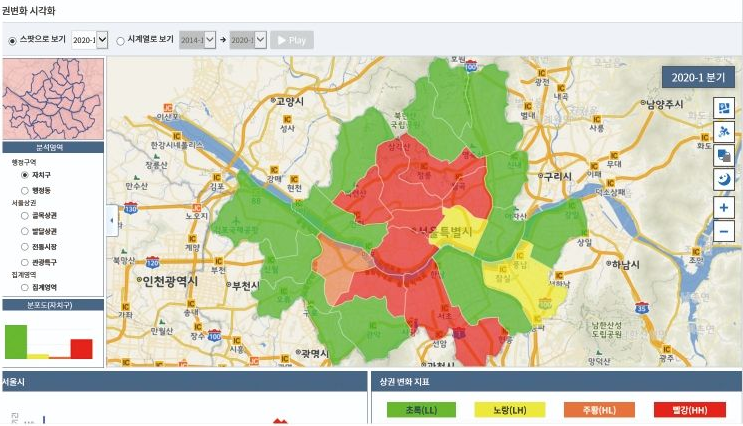

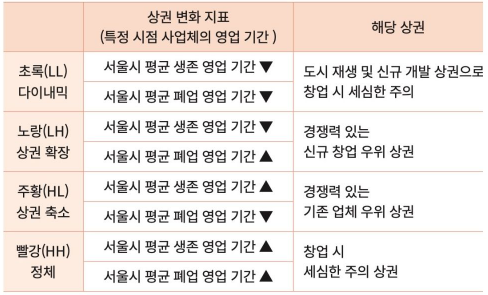

# 거주인구(상주인구), 5개년도 지도시각화

In [41]:
map = folium.plugins.DualMap(location=[37.541, 126.986], zoom_start = 11, tiles='CartoDB positron')


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2017 서울시 지역별 상주인구',
    data = sum_resi_pop_2017,
    columns = ['시군구명','총 상주인구 수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    show = False,
    legend_name="2017 지역구별 상주인구 수",
    overlay = True,
    Highlight = True
).add_to(map)


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2018 서울시 지역별 상주인구',
    data = sum_resi_pop_2018,
    columns = ['시군구명','총 상주인구 수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    show = False,
    legend_name="2018 지역구별 상주인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2019 서울시 지역별 상주인구',
    data = sum_resi_pop_2019,
    columns = ['시군구명','총 상주인구 수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    show = False,
    legend_name="2019 지역구별 상주인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2020 서울시 지역별 상주인구',
    data = sum_resi_pop_2020,
    columns = ['시군구명','총 상주인구 수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    show = False,
    legend_name="2020 지역구별 상주인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2021 서울시 지역별 상주인구',
    data = sum_resi_pop_2021,
    columns = ['시군구명','총 상주인구 수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2021 지역구별 상주인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.LayerControl(collapsed = True).add_to(map)

map.save('./resident_population_map.html')

map

# 유동인구(직장인구), 5개년도 지도시각화

In [42]:
map = folium.plugins.DualMap(location=[37.541, 126.986], zoom_start = 11, tiles='CartoDB positron')



folium.Choropleth(
    geo_data=seoul_geo,
    name = '2017 서울시 지역별 유동인구',
    data = sum_work_pop_2017,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2017 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2018 서울시 지역별 유동인구',
    data = sum_work_pop_2018,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2018 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2019 서울시 지역별 유동인구',
    data = sum_work_pop_2019,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2019 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2020 서울시 지역별 유동인구',
    data = sum_work_pop_2020,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2020 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2021 서울시 지역별 유동인구',
    data = sum_work_pop_2021,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    legend_name="2021 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.LayerControl(collapsed = True).add_to(map)

map.save('./working_population_map.html')

map

# 생활인구, 5개년도 지도시각화

In [43]:
map = folium.plugins.DualMap(location=[37.541, 126.986], zoom_start = 11, tiles='CartoDB positron')

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2017 서울시 지역별 생활인구',
    data = sum_life_pop_2017,
    columns = ['시군구명','총_생활인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    show = False,
    legend_name="2017 지역구별 생활인구 수",
    overlay = True,
    Highlight = True
).add_to(map)


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2018 서울시 지역별 생활인구',
    data = sum_life_pop_2018,
    columns = ['시군구명','총_생활인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    show = False,
    legend_name="2018 지역구별 생활인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2019 서울시 지역별 생활인구',
    data = sum_life_pop_2019,
    columns = ['시군구명','총_생활인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    show = False,
    legend_name="2019 지역구별 생활인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2020 서울시 지역별 생활인구',
    data = sum_life_pop_2020,
    columns = ['시군구명','총_생활인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    show = False,
    legend_name="2020 지역구별 생활인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2021 서울시 지역별 생활인구',
    data = sum_life_pop_2021,
    columns = ['시군구명','총_생활인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2021 지역구별 생활인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.LayerControl(collapsed = True).add_to(map)

map.save('./life_population_map.html')

map

# 주택/오피스상권, 5개년도 지도시각화

In [51]:
map = folium.plugins.DualMap(location=[37.541, 126.986], zoom_start = 11, tiles='CartoDB positron')


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2017 서울시 지역별 주택/오피스 상권',
    data = sum_work_pop_2017,
    columns = ['시군구명','주택/오피스상권분류'],
    fill_color='RdBu', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2017 지역구별 주택/오피스 상권",
    overlay = True,
    Highlight = True
).add_to(map)


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2018 서울시 지역별 주택/오피스 상권',
    data = sum_work_pop_2018,
    columns = ['시군구명','주택/오피스상권분류'],
    fill_color='RdBu', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2018 지역구별 주택/오피스 상권",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2019 서울시 지역별 주택/오피스 상권',
    data = sum_work_pop_2019,
    columns = ['시군구명','주택/오피스상권분류'],
    fill_color='RdBu', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2019 지역구별 주택/오피스 상권",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2020 서울시 지역별 주택/오피스 상권',
    data = sum_work_pop_2020,
    columns = ['시군구명','주택/오피스상권분류'],
    fill_color='RdBu', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2020 지역구별 주택/오피스 상권",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2021 서울시 지역별 주택/오피스 상권',
    data = sum_work_pop_2021,
    columns = ['시군구명','주택/오피스상권분류'],
    fill_color='RdBu', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2021 지역구별 주택/오피스 상권",
    overlay = True,
    Highlight = True
).add_to(map)

folium.LayerControl(collapsed = True).add_to(map)

map.save('./resi_and_office_population_map.html')

map

# 자치구별 상권변화지표

In [45]:
map = folium.plugins.DualMap(location=[37.541, 126.986], zoom_start = 11, tiles='CartoDB positron')


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2017 자치구별 상권변화지표',
    data = gu_change_2017,
    columns = ['시군구명', '상권_변화_지표'],
    fill_color='RdYlGn', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2017 자치구별 상권 변화지표",
    overlay = True
).add_to(map)


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2018 자치구별 상권변화지표',
    data = gu_change_2018,
    columns = ['시군구명', '상권_변화_지표'],
    fill_color='RdYlGn', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2018 자치구별 상권 변화지표",
    overlay = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2019 자치구별 상권변화지표',
    data = gu_change_2019,
    columns = ['시군구명', '상권_변화_지표'],
    fill_color='RdYlGn', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2019 자치구별 상권 변화지표",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2020 자치구별 상권변화지표',
    data = gu_change_2020,
    columns = ['시군구명', '상권_변화_지표'],
    fill_color='RdYlGn', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2020 자치구별 상권 변화지표",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2021 자치구별 상권변화지표',
    data = gu_change_2021,
    columns = ['시군구명', '상권_변화_지표'],
    fill_color='RdYlGn', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='properties.name',
    #show = False,
    legend_name="2021 자치구별 상권 변화지표",
    overlay = True,
    Highlight = True
).add_to(map)


folium.LayerControl(collapsed = True).add_to(map)

map.save('./change_index_map.html')

map

# 지하철역 맵핑

In [46]:
subway = pd.read_csv('./reference/station_coordinate.csv', sep = ',')
subway = subway[subway['line'] == "02호선"]
subway

line       name   code        lat         lng
98   02호선         강변  214.0  37.535095  127.094681
99   02호선       잠실나루  215.0  37.520733  127.103790
100  02호선         잠실  216.0  37.513950  127.102234
101  02호선       잠실새내  217.0  37.511687  127.086162
102  02호선      종합운동장  218.0  37.510997  127.073642
103  02호선         삼성  219.0  37.508844  127.063160
104  02호선         선릉  220.0  37.504503  127.049008
105  02호선         역삼  221.0  37.500622  127.036456
106  02호선         강남  222.0  37.497175  127.027926
107  02호선         교대  223.0  37.493415  127.014080
108  02호선         방배  225.0  37.481426  126.997596
109  02호선         사당  226.0  37.476530  126.981685
110  02호선        낙성대  227.0  37.476930  126.963693
111  02호선      서울대입구  228.0  37.481247  126.952739
112  02호선         봉천  229.0  37.482362  126.941892
113  02호선         신림  230.0  37.484201  126.929715
114  02호선        신대방  231.0  37.487462  126.913149
115  02호선    구로디지털단지  232.0  37.485266  126.901401
116  02호선        신도림  234.0  37.508725  126.891295
117  02호선         문래  235.0  37.517933  126.894760
118  02호선      영등포구청  236.0  37.524970  126.895951
119  02호선         용답  244.0  37.561904  127.050899
120  02호선      신정네거리  249.0  37.520074  126.852912
121  02호선      을지로입구  202.0  37.566014  126.982618
122  02호선      을지로3가  203.0  37.566295  126.991910
123  02호선      을지로4가  204.0  37.566941  126.998079
124  02호선  동대문역사문화공원  205.0  37.565138  127.007896
125  02호선         신당  206.0  37.565972  127.017820
126  02호선        한양대  209.0  37.555273  127.043655
127  02호선         뚝섬  210.0  37.547184  127.047367
128  02호선         성수  211.0  37.544581  127.055961
129  02호선       건대입구  212.0  37.540693  127.070230
130  02호선         구의  213.0  37.537077  127.085916
131  02호선         당산  237.0  37.534380  126.902281
132  02호선         합정  238.0  37.549463  126.913739
133  02호선       홍대입구  239.0  37.557192  126.925381
134  02호선         신촌  240.0  37.555134  126.936893
135  02호선         이대  241.0  37.556733  126.946013
136  02호선         아현  242.0  37.557345  126.956141
137  02호선        충정로  243.0  37.559973  126.963672
138  02호선         신답  245.0  37.570040  127.046481
139  02호선        까치산  200.0  37.531768  126.846683
140  02호선         시청  201.0  37.564718  126.977108
141  02호선         서초  224.0  37.491897  127.007917
142  02호선        왕십리  208.0  37.561533  127.037732
143  02호선       상왕십리  207.0  37.564354  127.029354
144  02호선         대림  233.0  37.492970  126.895801
145  02호선        신설동  246.0  37.575297  127.025087
146  02호선        도림천  247.0  37.514287  126.882768
147  02호선       양천구청  248.0  37.512398  126.865819
148  02호선         용두  250.0  37.574028  127.038091

In [47]:
subway.isnull().sum()

line    0
name    0
code    0
lat     0
lng     0
dtype: int64

In [48]:
subway= subway.dropna(subset =['lat'])

In [49]:
subway_map = subway
subway_map = subway_map.reset_index()

map = folium.plugins.DualMap(
    location=[37.541, 126.986], control_scale=True,
    zoom_start = 11, tiles='CartoDB positron'
    )

# folium.GeoJson(
#     seoul_geo,
#     name='지역구'
# ).add_to(map)


train_group = folium.FeatureGroup(name="Trains").add_to(map)

for n in subway_map.index:
    icon=folium.Icon(color='green', icon='train', icon_color="black", prefix='fa')
    train_group.add_child(folium.Marker([subway_map.loc[n, 'lat'], subway_map.loc[n, 'lng']],
                                        icon = icon))

    # folium.CircleMarker(
    #     location = [subway_map.loc[n, 'lat'], subway_map.loc[n, 'lng']],
    #     radius = 0.5,
    #     color = 'blue',
    #     fill = True,
    #     fill_color = 'blue'
    # ).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2017 서울시 지역별 유동인구',
    data = sum_work_pop_2017,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2017 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)


folium.Choropleth(
    geo_data=seoul_geo,
    name = '2018 서울시 지역별 유동인구',
    data = sum_work_pop_2018,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2018 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2019 서울시 지역별 유동인구',
    data = sum_work_pop_2019,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2019 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2020 서울시 지역별 유동인구',
    data = sum_work_pop_2020,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    show = False,
    legend_name="2020 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)

folium.Choropleth(
    geo_data=seoul_geo,
    name = '2021 서울시 지역별 유동인구',
    data = sum_work_pop_2021,
    columns = ['시군구명','총_직장_인구_수'],
    fill_color='Reds', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.7,
    key_on='feature.properties.name',
    legend_name="2021 지역구별 유동인구 수",
    overlay = True,
    Highlight = True
).add_to(map)





folium.LayerControl(collapsed = True).add_to(map)


map.save('./subway_pop_map.html')

map                         